# San_Francisco_Airport_Clustering

<img src='San_Francisco_International_Airport_at_night.jpeg'>

In [ ]:
#KMeans En Yakın Komşu Kümelemesi

In [2]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#yolcu sayısına göre ve uçus sayısına göre clustring

In [5]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [6]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [8]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


In [10]:
x.head()

,Activity Period,Passenger Count
0,200507,27271
1,200507,29131
2,200507,5415
3,200507,35156
4,200507,34090


In [11]:
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)
del df["Activity Period"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Operating Airline            18885 non-null  object
 1   Operating Airline IATA Code  18822 non-null  object
 2   Published Airline            18885 non-null  object
 3   Published Airline IATA Code  18822 non-null  object
 4   GEO Summary                  18885 non-null  object
 5   GEO Region                   18885 non-null  object
 6   Activity Type Code           18885 non-null  object
 7   Price Category Code          18885 non-null  object
 8   Terminal                     18885 non-null  object
 9   Boarding Area                18885 non-null  object
 10  Passenger Count              18885 non-null  int64 
 11  Activity Month               18885 non-null  int32 
 12  Activity Year                18885 non-null  int32 
dtypes: int32(2), int64(1), object(1

In [13]:
x=df[["Activity Year","Activity Month","Passenger Count"]]

In [15]:
x.corr()

,Activity Year,Activity Month,Passenger Count
Activity Year,1.000000,-0.118555,0.050497
Activity Month,-0.118555,1.000000,0.014507
Passenger Count,0.050497,0.014507,1.000000


<AxesSubplot:>

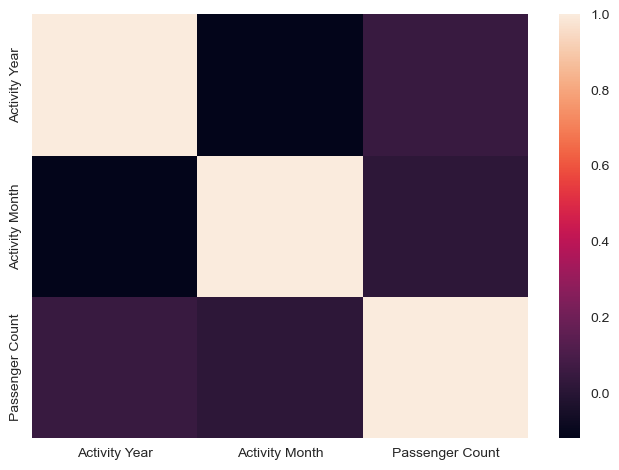

In [16]:
sns.heatmap(x.corr())

In [20]:
#Hava yolu şirketlerinin kaç defa uçuş yaptıkları
airline_count = df["Operating Airline"].value_counts() 

In [21]:
#Hava yolu şirketleri ile uçan yolcu
airline_passenger_count=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False) 

In [22]:
list_group=pd.DataFrame(airline_passenger_count)
list_group.head(10)

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
Delta Air Lines,34813833
Southwest Airlines,33414970
Alaska Airlines,17540235
US Airways,16816616


Text(0.5, 1.0, 'Hava yolu şirketlerinin taşıdığı yolcu sayıları')

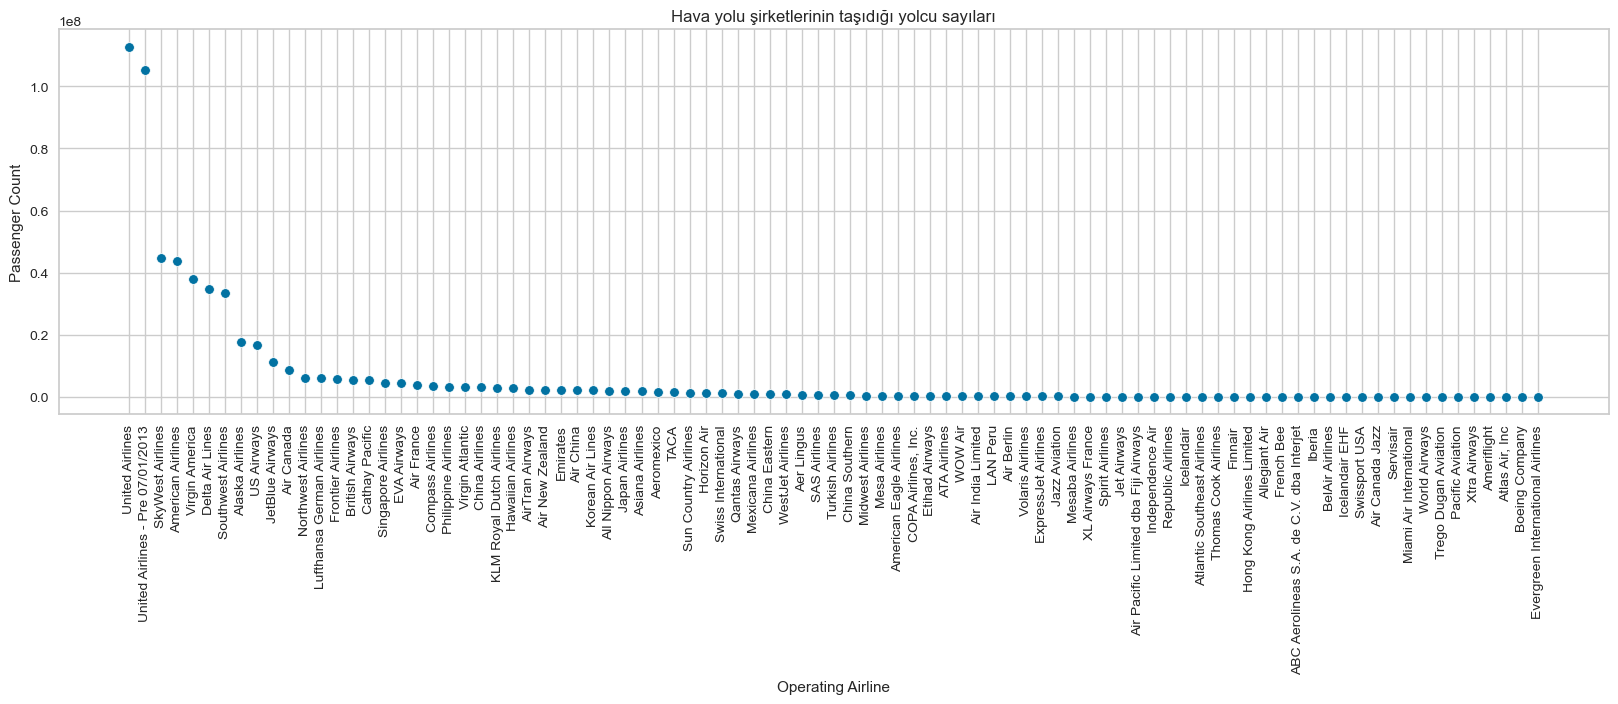

In [23]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Operating Airline",y="Passenger Count",data=list_group)
plt.xticks(rotation=90);
plt.title("Hava yolu şirketlerinin taşıdığı yolcu sayıları")

In [24]:
#Hava yolu şirketleri ile uçan yolcu sa
airline_passenger_count_of_year=df.groupby(df["Activity Year"]).sum()["Passenger Count"].sort_values(ascending=False) 

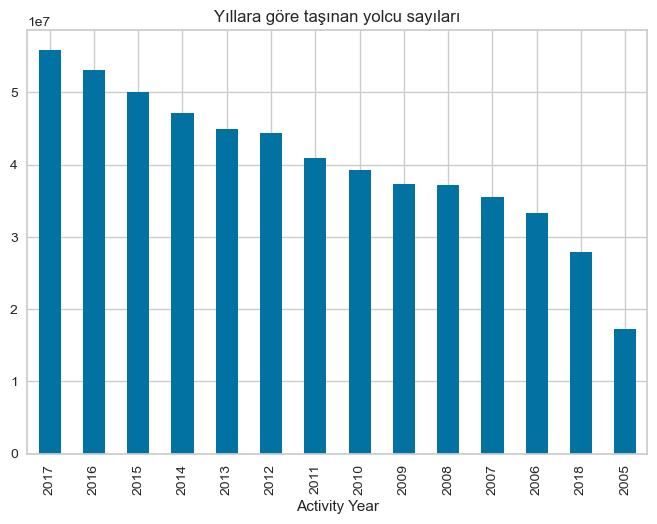

In [25]:
airline_passenger_count_of_year.plot.bar()
plt.title("Yıllara göre taşınan yolcu sayıları");

In [28]:
x.head()

,Activity Year,Activity Month,Passenger Count
0,2005,7,27271
1,2005,7,29131
2,2005,7,5415
3,2005,7,35156
4,2005,7,34090


In [70]:
model=KMeans(4)

In [71]:
model=model.fit(x)

In [72]:
tahmin=model.predict(x)

In [73]:
tahmin

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
x['cluster']=tahmin

In [75]:
x.head()

,Activity Year,Activity Month,Passenger Count,cluster
0,2005,7,27271,0
1,2005,7,29131,0
2,2005,7,5415,0
3,2005,7,35156,3
4,2005,7,34090,0


In [76]:
silhouette_score(x,tahmin)

0.7862886980599738

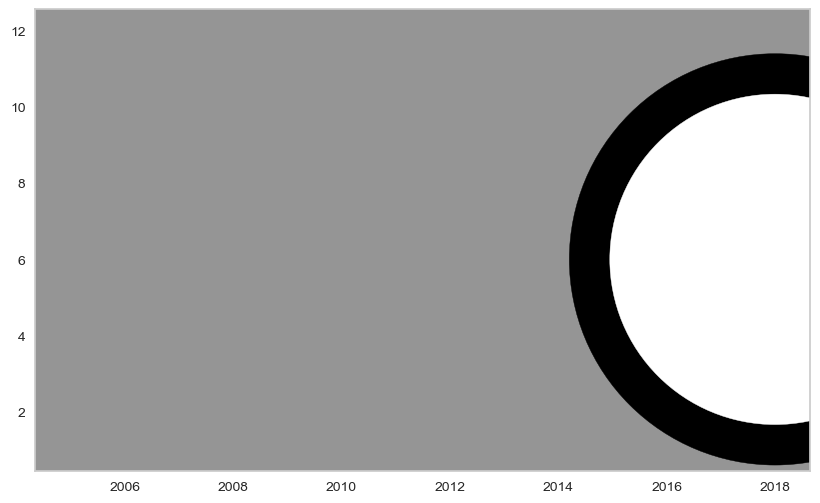

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(x["Activity Year"],x["Activity Month"],x["Passenger Count"],c=tahmin);

In [91]:
allscore=[]
allcluster=[]
distances=[] 
def fnc_clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)         
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        all_score.append(score)
        distance=model.inertia_
        print("Cluster..:",i," Score..:", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance) 

In [92]:
fnc_clust(10)

Cluster..: 2  Score..: 0.8596461178957715
Cluster..: 3  Score..: 0.8286156927271824
Cluster..: 4  Score..: 0.7861522980454637
Cluster..: 5  Score..: 0.784492113190876
Cluster..: 6  Score..: 0.6609148209008221
Cluster..: 7  Score..: 0.6586107394390706
Cluster..: 8  Score..: 0.6503319920321312
Cluster..: 9  Score..: 0.6408206885823742
Cluster..: 10  Score..: 0.6162132289321612


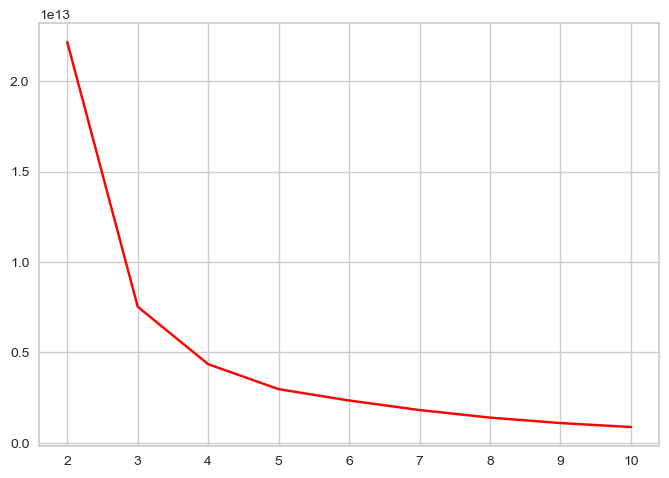

In [93]:
## 3 gruptan itibaren düşmeye başlamış
plt.plot(allcluster,distances,color='Red');
#Elbow Dirsek Metodu

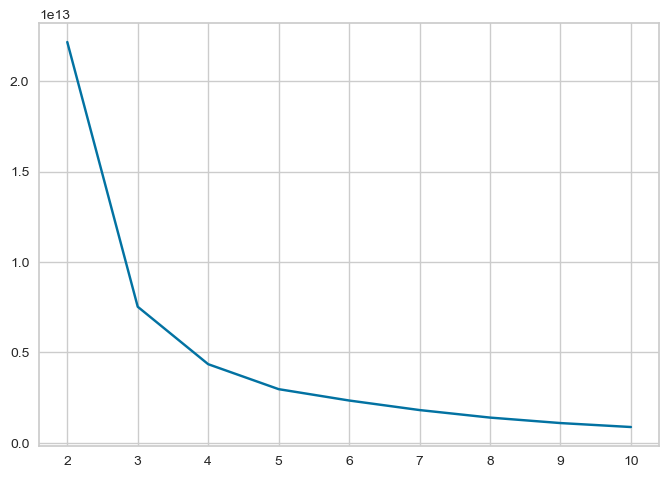

In [94]:
plt.plot(allcluster,distances,marker="x")

# Hierarchical Clustering

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [100]:
link_data=linkage(x,method="ward",metric="euclidean")

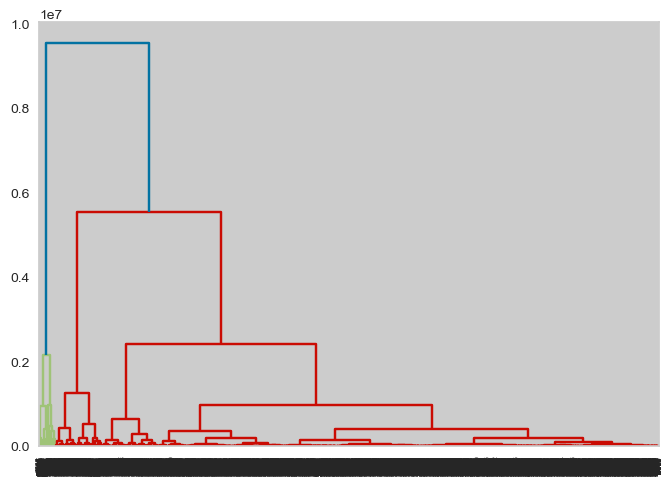

In [101]:
dendrogram(link_data)
plt.show()